In [257]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# <font color='red'>1. Import Libraries and Check Data<font color='red'> 🧐

In [258]:
# Basic Libraries 📚
# --------------------------------------
import random
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Metrics 📐
# --------------------------------------
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Machine Learning Models 🤖
# --------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### Loading Datasets

In [259]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [260]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [261]:
print("TRAING DATA")
print(data.shape)
print("TESTING DATA")
print(test.shape)

TRAING DATA
(891, 12)
TESTING DATA
(418, 11)


### EDA

In [262]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**OBSERVATIONS**

- Mean age is 30. One crude way to fill missing ages is to make them all the age = 30.
- The mean of the SURVIVED col shows 38% survival rate. Roughly 1 in 3 survive the Titanic
- Fare = 0 needs investigation

In [263]:
print(round (data.isnull().sum().sort_values(ascending=False)/len(data)*100,1))

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
dtype: float64


**Observation**
- With 77% missing data the Cabin info seems pretty useless
- Roughly 1 in 5 ages are missing and we will have to guess the age
- The Embarked needs to be fixed

<Axes: xlabel='Age', ylabel='Density'>

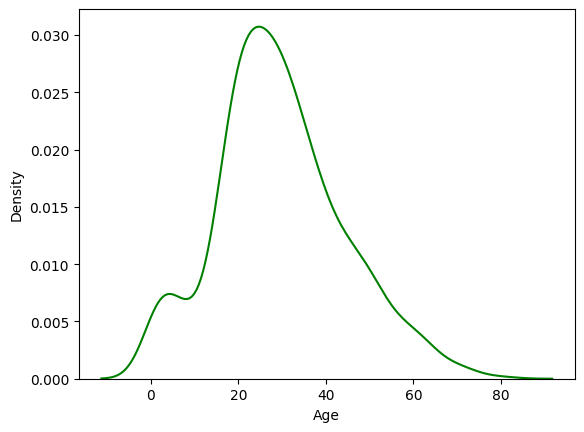

In [264]:
# We  need visuals for our next question

# How is age linked to survival
# Let us use what is called a density plot & Histogram to see the Age distribution

sns.kdeplot(data['Age'], color="green")

Axes(0.125,0.11;0.775x0.77)


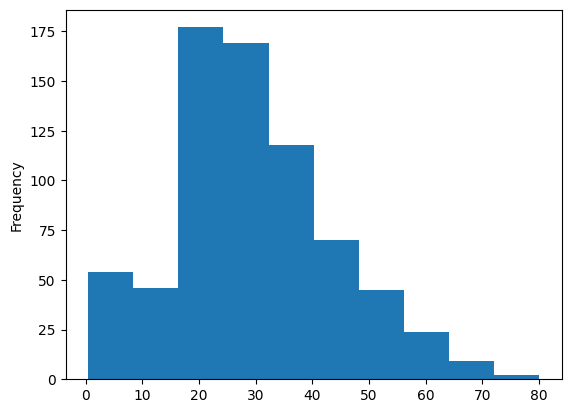

In [265]:
# I think a histogram would serve us better. 
# Group into 10 bins
print(data['Age'].plot(kind='hist',bins=10))

**Observations**

- Majority of the people on the Titanic are in the 20-30 age range.
- There is also a sizeable 0-20 & a 30-45.

In [266]:
print(round(data [['Pclass','Survived']].groupby(['Pclass']).mean()*100,1))

        Survived
Pclass          
1           63.0
2           47.3
3           24.2


**Observation**

- 2nd class passengers had twice the survival rate of 3rd class and 1st class passengers had even better rates.

In [267]:
print(round(data [['Sex','Survived']].groupby(['Sex']).mean()*100,1))

        Survived
Sex             
female      74.2
male        18.9


**Observations**

- 74% of females survived
- 19% males survived.

In [268]:
print(round(data [['Sex', 'Pclass','Survived']].\
                       groupby(['Pclass', 'Sex']).mean()*100,1))

               Survived
Pclass Sex             
1      female      96.8
       male        36.9
2      female      92.1
       male        15.7
3      female      50.0
       male        13.5


**Observations**

- Basically almost all Pclass 1 females survive and so do most of Pclass 2. 
- Pclass 3 female survival is 50% and almost all (86%) Pclass 3 males unfortunately do not survive.

In [269]:
##Lastly let us see if Embarked has any real relevant significance to survival
print(round(data [['Embarked', 'Sex', 'Pclass','Survived']].\
            groupby(['Embarked', 'Pclass', 'Sex']).mean()*100,1))

                        Survived
Embarked Pclass Sex             
C        1      female      97.7
                male        40.5
         2      female     100.0
                male        20.0
         3      female      65.2
                male        23.3
Q        1      female     100.0
                male         0.0
         2      female     100.0
                male         0.0
         3      female      72.7
                male         7.7
S        1      female      95.8
                male        35.4
         2      female      91.0
                male        15.5
         3      female      37.5
                male        12.8


In [270]:
# Ideally the percentages should be same as seen before but you can see some issues begin to emerge. 
# For e.g we see that for Embarked = Q, 100% of males in Pclass 1 and Pclass 2 expire 
# This goes against the data we just saw earlier. So let us see what is happening?
print(data[(data.Pclass==1) & (data.Sex=='male') & (data.Embarked=='Q')])

     PassengerId  Survived  Pclass                         Name   Sex   Age  \
245          246         0       1  Minahan, Dr. William Edward  male  44.0   

     SibSp  Parch Ticket  Fare Cabin Embarked  
245      2      0  19928  90.0   C78        Q  


**Observations**
- We see just 1 male passenger embarked into Pclass 1 at port Q and he unfortunately did not survive. 
- **We based our entire analysis of 100% death based on this single passenger**
- **We could have gone completelyoff track.**

<Axes: xlabel='Survived', ylabel='Age'>

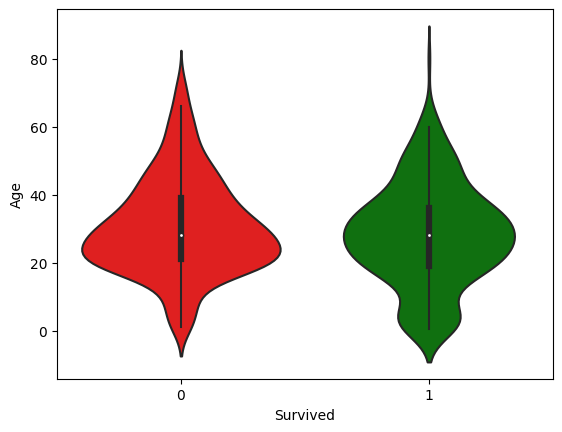

In [271]:
# How does survival depend on age? Let us plot violin-plot
sns.violinplot(x='Survived', y='Age', data = data, palette={0: "r", 1: "g"})

**Observations**

- Comparision shows that between 0-10 age survival rate is higher(green is fatter than red in this age range)
- After age 15 or so, expiry (red) just fattens out rapidly peaking at around 22 years of age
- After about 65 or so, almost all expire

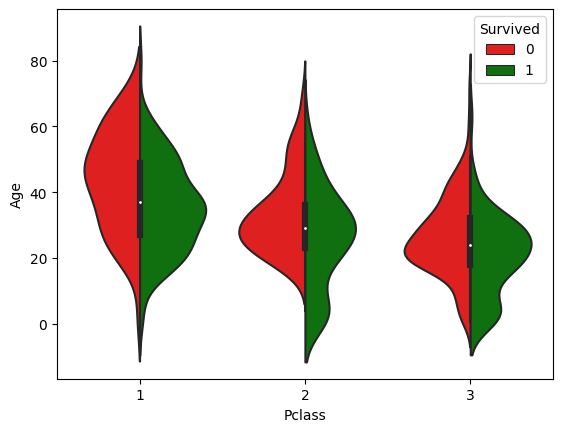

In [272]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True ,data = data, palette={0: "r", 1: "g"});

**Observations**

- PClass 2 and 3 have a very sharp peak of expiry near the 20-35 age range
- PClass 1 has far more survivors across all age levels except maybe after 50 or so. 
- In PClass 1 After 60 there is a sharp jump in expiry. This is not as sharp in Pclass 2 or 3.

In [273]:
print('Pclass 1 survivors above Age 60:', round(len(data[(data['Pclass']==1) & \
    (data['Age']>59) & (data['Survived']==True)])/len(data[(data\
    ['Pclass']==1) & (data['Age']>59)])*100,1), '%')
print('Pclass 2 survivors above Age 60:', round(len(data[(data['Pclass']==2) & \
    (data['Age']>59) & (data['Survived']==True)])/len(data[(data \
    ['Pclass']==2) & (data['Age']>59)])*100,1), '%')
print('Pclass 3 survivors above Age 60:', round(len(data[(data['Pclass']==3) & \
    (data['Age']>59) & (data['Survived']==True)])/len(data[(data \
    ['Pclass']==3) & (data['Age']>59)])*100,1), '%')

print('Pclass1 survivors between 20-30 Age:',round(len(data[(data['Pclass']==1) \
    &(data['Age']>19) & (data['Age']<31) & (data['Survived']==True)])/len( \
    data[(data['Pclass']==1) & (data['Age']>19) \
    & (data['Age']<31)])*100,1),'%')
print('Pclass2 survivors between 20-30 Age:',round(len(data[(data['Pclass']==2) \
    &(data['Age']>19) & (data['Age']<31) &(data['Survived']==True)])/len( \
    data[(data['Pclass']==2)&(data['Age']>19) \
    &(data['Age']<31)])*100,1),'%')
print('Pclass3 survivors between 20-30 Age:',round(len(data[(data['Pclass']==3) \
    &(data['Age']>19) & (data['Age']<31) &(data['Survived']==True)])/len( \
    data[(data['Pclass']==3) & (data['Age']>19) \
    &(data['Age']<31)])*100,1),'%')

Pclass 1 survivors above Age 60: 29.4 %
Pclass 2 survivors above Age 60: 25.0 %
Pclass 3 survivors above Age 60: 20.0 %
Pclass1 survivors between 20-30 Age: 72.5 %
Pclass2 survivors between 20-30 Age: 41.0 %
Pclass3 survivors between 20-30 Age: 22.6 %


In [274]:
print('Pclass 2 adult male survivors:',round(len(data[(data['Pclass']==2) & \
        (data['Age']>19) & (data['Sex']=='male') & (data['Survived'] \
        == True)])/len(data[(data['Pclass']==2) & (data['Age']>19) & \
        (data['Sex']=='male')])*100,1),'%')

print('Pclass 3 adult male survivors:',round(len(data[(data['Pclass']==3) & \
        (data['Age']>19) & (data['Sex']=='male') & (data['Survived'] \
        == True)])/len(data[(data['Pclass']==3) & (data['Age']>19) & \
        (data['Sex']=='male')])*100,1),'%')

Pclass 2 adult male survivors: 6.2 %
Pclass 3 adult male survivors: 13.7 %


# <font color='red'>2. Data Preprocessing<font color='red'> 📝

## On Training Data

In [275]:
## gender function - which will use to fill 1 and 0 for genders
def male_fun(g):
    if g == 'male':
        return 1
    else:
        return 0
    
def female_fun(g):
    if g == 'female':
        return 1
    else:
        return 0

In [276]:
##adding new MALE & FEMALE feature which will represent with 0 & 1
data["Male"] = data["Sex"].apply(male_fun)
data["Female"] = data["Sex"].apply(female_fun)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [277]:
## embarked function - which will be used to fill 1 and 0 depending on the embark
def cherbourg(s):
    if s=="C":
        return 1
    else:
        return 0
    
def queenstown(s):
    if s=="Q":
        return 1
    else:
        return 0

def southamptom(s):
    if s=="S":
        return 1
    else:
        return 0

In [278]:
##adding new EMBARKED feature which will represent with 0 & 1
data["Cherbourg"] = data.Embarked.apply(cherbourg)
data["Queenstown"] = data.Embarked.apply(queenstown)
data["Southamptom"] = data.Embarked.apply(southamptom)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female,Cherbourg,Queenstown,Southamptom
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,1


In [279]:
##Handling NAN of age with mean value of age
data["Age"].fillna(data["Age"].mean(), inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female,Cherbourg,Queenstown,Southamptom
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,1


In [280]:
##Handling the NAN of cabin

def cabin(x):
    if x is np.nan:
        return 0
    else:
        return 1
    
data["Cabin"] = data["Cabin"].apply(cabin)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female,Cherbourg,Queenstown,Southamptom
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1,0,0,0,1


In [281]:
##Dropping the useless columns
data.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [282]:
##Rearranging the whole dataset accordingly
data = data[['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Cabin','Male','Female','Cherbourg','Queenstown','Southamptom','Survived']]
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom,Survived
0,1,3,22.0,1,0,7.2500,0,1,0,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,0,1,1,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1,1
3,4,1,35.0,1,0,53.1000,1,0,1,0,0,1,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,0,1,0


In [283]:
data = data.values
data.shape

(891, 13)

In [284]:
##Dividing the dataset into training and testing
X = data[:,0:12]
Y = data[:,12]
print(X.shape)
print(Y.shape)

(891, 12)
(891,)


In [285]:
##converting training data into dataframe
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,1.0,0.0,0.0,1.0
4,5.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,0.0,1.0


In [286]:
##adding extra dummy features
features = df.columns
N = len(features)

for i in range(N):
    for j in range(i, N):
        ele = str(i) + "_" + str(j)
        df[ele] = df[i]*df[j]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,8_8,8_9,8_10,8_11,9_9,9_10,9_11,10_10,10_11,11_11
0,1.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [287]:
##converting dataframe into numpy
X = df.values
X.shape

(891, 90)

In [288]:
##Feature Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaledX = scaler.transform(X)
scaledX.shape

(891, 90)

In [289]:
##adding extra one coloumn in the end(intercept)
X_train = np.append(scaledX,np.ones(scaledX.shape[0]).reshape(-1,1),axis=1)
X_train.shape

(891, 91)

## On Testing Data

In [290]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [291]:
##adding new MALE & FEMALE feature which will represent with 0 & 1
test["Male"] = test["Sex"].apply(male_fun)
test["Female"] = test["Sex"].apply(female_fun)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1


In [292]:
##adding new EMBARKED feature which will represent with 0 & 1
test["Cherbourg"] = test.Embarked.apply(cherbourg)
test["Queenstown"] = test.Embarked.apply(queenstown)
test["Southamptom"] = test.Embarked.apply(southamptom)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female,Cherbourg,Queenstown,Southamptom
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1,0,0,1


In [293]:
##Handling NAN of age with mean value of age
test["Age"].fillna(test["Age"].mean(), inplace = True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female,Cherbourg,Queenstown,Southamptom
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1,0,0,1


In [294]:
test["Cabin"] = test["Cabin"].apply(cabin)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female,Cherbourg,Queenstown,Southamptom
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0,1,0,0,1


In [295]:
##Dropping the useless columns
test.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,1


In [296]:
test = test.values
test.shape

(418, 12)

In [297]:
##converting numpy to dataframe
df = pd.DataFrame(test)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,892.0,3.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,0.0,1.0,0.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,0.0,1.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,0.0,1.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,0.0,1.0


In [298]:
##adding dummy features
features = df.columns
N = len(features)

for i in range(N):
    for j in range(i, N):
        ele = str(i) + "_" + str(j)
        df[ele] = df[i]*df[j]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,8_8,8_9,8_10,8_11,9_9,9_10,9_11,10_10,10_11,11_11
0,892.0,3.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [299]:
##converting dataframe back to numpy
test = df.values
test.shape

(418, 90)

In [300]:
##Feature Scaling
scaledX_test = scaler.transform(test)
scaledX_test.shape

(418, 90)

In [301]:
##adding extra one coloumn in the end(intercept)
X_test = np.append(scaledX_test,np.ones(scaledX_test.shape[0]).reshape(-1,1),axis=1)
X_test.shape

(418, 91)

# <font color='red'>3. Creating Model & Predicting💻<font color='red'>

### Random Forest

In [302]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y)
x_pred_tree = random_forest.predict(X_train)
random_forest.score(X_train, Y)

1.0

In [303]:
print(pd.DataFrame(confusion_matrix(x_pred_tree,Y),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']))

            Predicted No  Predicted Yes
Actual No            549              0
Actual Yes             0            342


In [304]:
print(classification_report(x_pred_tree,Y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       549
         1.0       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891

